## Titanic Data Analysis

## Imports

In [504]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [3]:
%matplotlib inline

In [523]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [271]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


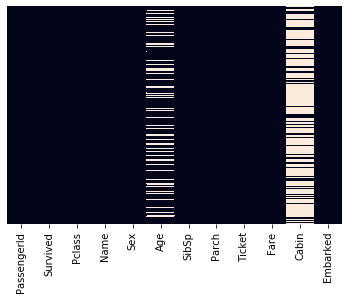

In [272]:
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False)

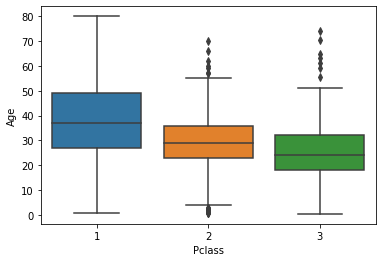

In [221]:
sns.boxplot(x='Pclass',y='Age',data=train_data)

In [376]:
# sns.pairplot(train_data)
train_data['Age'].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

In [494]:
def age_filter(cols):
    age = cols[0]
    pclass = cols[1]
    
    if pd.isnull(age):
        if pclass == 1:
            return 38
        elif pclass == 2:
            return 29
        else:
            return 24
    else:
        return age

def cleansing_data(dataset):
    dataset.drop(['Cabin','Name','Ticket'],axis=1,inplace=True)
    
    dataset.dropna()
    
    dataset['Age'] = dataset[['Age','Pclass']].apply(age_filter,axis=1)
    
    sex = pd.get_dummies(dataset['Sex'],drop_first=True)
    embarked = pd.get_dummies(dataset['Embarked'],drop_first=True)
        
    dataset.drop(['Sex','Embarked'],axis=1,inplace=True)
    
    dataset = pd.concat([dataset,sex,embarked],axis=1)
    
    return dataset

In [524]:
#Cleansing the datas
train_data = cleansing_data(train_data)
test_data = cleansing_data(test_data)

In [525]:
X = train_data.drop(['Survived','PassengerId'],axis=1)
y = train_data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [526]:
logmodel = LogisticRegression(solver='lbfgs')

In [527]:
logmodel.fit(X_train,y_train)

/home/d4rks0ul/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [528]:
predictions = logmodel.predict(X_test)

In [529]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.78      0.88      0.83       154
           1       0.80      0.67      0.73       114

    accuracy                           0.79       268
   macro avg       0.79      0.77      0.78       268
weighted avg       0.79      0.79      0.78       268



In [530]:
test_d = test_data.drop(['PassengerId'],axis=1)
test_d = test_d.fillna(np.mean(test_data))
predictions = logmodel.predict(test_d)

In [531]:
test_data['Survived'] = predictions

In [532]:
result = pd.DataFrame(test_data[['PassengerId','Survived']],columns=['PassengerId','Survived'])

In [533]:
result.to_csv('prediction_result.csv',index=False)